Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 9.627200e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


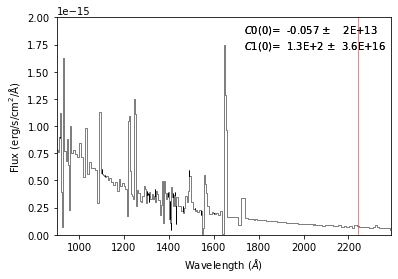

In [3]:
import pyspeckit 
import numpy as np

#continuum fitting with a polynomial function

#loading data
data = '09-14_edited.txt'

# plotting data
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 900, xmax = 2391, ymin = 0, ymax = 2e-15)
sp.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
sp.plotter.refresh()

#continuum fit
sp.specfit.Registry.add_fitter('polycontinuum',
                               pyspeckit.models.polynomial_continuum.poly_fitter(),
                               2)
sp.specfit(fittype='polycontinuum', guesses=(0,0),exclude=[931,1700])

# subtract the model fit to create a new spectrum
#sp_contsub = sp.copy()
#sp_contsub.data -= sp.specfit.get_full_model()
#sp_contsub.plotter()

# Fit with automatic guesses
#sp_contsub.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
#data = sp_contsub.data
#amplitude_guess = data.max()
#center_guess = (data*xaxis).sum()/data.sum()
#width_guess = (data.sum() / amplitude_guess / (2*np.pi))**0.5
#guesses = [amplitude_guess, center_guess, width_guess]
#sp_contsub.specfit(fittype='gaussian', guesses=guesses)

#sp_contsub.plotter(errstyle='fill')
#sp_contsub.specfit.plot_fit()



Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 9.627200e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]
Line   Flux (erg/s/cm^2)     Amplitude (erg/s/cm^2)    FWHM (Angstrom)   Luminosity (erg/s)
unknown_1 3.329655397375429e-32 5.1943203388529644e-33 6.021966689502867 1.961467757409106e+23
unknown_2 2.5118803340655774e-32 3.91857701499266e-33 6.021966689502867 1.4797243851791044e+23
unknown_3 6.049796318492101e-30 6.959021347566193e-33 816.6958982126228 3.5638764380747067e+25
unknown_4 9.98896619212629e-32 1.5582961016558895e-32 6.021966689502867 5.884403272227318e+23
unknown_5 -1.643153832382889e-32 -2.563348560976708e-33 6.021966689502867 -9.679660139072465e+22
unknown_6 9.680202143242853e-32 1.510128372938797e-32 6.021966689502867 5.702513360433644e+23


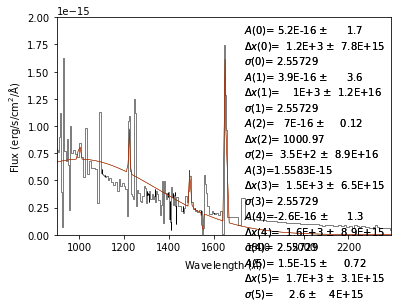

In [45]:
import pyspeckit 

# Rest wavelengths of the lines we are fitting - use as initial guesses
Lalpha = 1215
NV = 1240
NIV = 1490
CIV = 1550
HeII = 1640

# Initialize spectrum object and plot region surrounding Halpha-[NII] complex
spec = pyspeckit.Spectrum('09-14_edited.txt', errorcol=2)
spec.plotter(xmin = 900, xmax = 2391, ymin = 0, ymax = 2e-15)

# We fit the [NII] and [SII] doublets, and allow two components for Halpha.
# The widths of all narrow lines are tied to the widths of [SII].
guesses = [50, Lalpha, 5, 100, NV, 5, 50, NV, 50, 50, NIV, 5, 20, CIV,
           5, 20, HeII, 5]
tied = ['', '', 'p[17]', '', '', 'p[17]', '', 'p[4]', '', '3 * p[0]', '',
        'p[17]', '', '', 'p[17]', '', '', '']

# Actually do the fit.
spec.specfit(guesses = guesses, tied = tied, annotate = False, color='g')
spec.plotter.refresh()

# Let's use the measurements class to derive information about the emission
# lines.  The galaxy's redshift and the flux normalization of the spectrum
# must be supplied to convert measured fluxes to line luminosities.  If the
# spectrum we loaded in FITS format, 'BUNITS' would be read and we would not
# need to supply 'fluxnorm'.
spec.measure(z = 0.05, fluxnorm = 1e-17)

# Now overplot positions of lines and annotate

y = spec.plotter.ymax * 0.85    # Location of annotations in y

for i, line in enumerate(spec.measurements.lines.keys()):

    # If this line is not in our database of lines, don't try to annotate it
    if line not in spec.speclines.optical.lines.keys(): continue

    x = spec.measurements.lines[line]['modelpars'][1]   # Location of the emission line
    # Draw dashed line to mark its position
    spec.plotter.axis.plot([x]*2, [spec.plotter.ymin, spec.plotter.ymax],
                           ls='--', color='k')
    # Label it
    spec.plotter.axis.annotate(spec.speclines.optical.lines[line][-1], (x, y),
                               rotation = 90, ha = 'right', va = 'center')
# Make some nice axis labels
spec.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
spec.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
spec.plotter.refresh()

# Print out spectral line information
print("Line   Flux (erg/s/cm^2)     Amplitude (erg/s/cm^2)"
      "    FWHM (Angstrom)   Luminosity (erg/s)")
for line in spec.measurements.lines.keys():
    print(line, spec.measurements.lines[line]['flux'],
          spec.measurements.lines[line]['amp'],
          spec.measurements.lines[line]['fwhm'],
          spec.measurements.lines[line]['lum'])

# Had we not supplied the objects redshift (or distance), the line
# luminosities would not have been measured, but integrated fluxes would
# still be derived.  Also, the measurements class separates the broad and
# narrow H-alpha components, and identifies which lines are which. How nice!

spec.specfit.plot_fit()

In [3]:
import pyspeckit 
import numpy as np

#try and fit continuum w/ a gaussian :(
#loading data
data = '09-14_edited.txt'

# plotting data
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 900, xmax = 2391, ymin = 0, ymax = 2e-15)
sp.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
sp.plotter.refresh()

#Fitting with automatic guesses
sp.specfit(fittype='gaussian')

#Fit with input guesses
#amplitude_guess = 7e-16
#center_guess = 850
#width_guess = 350
#guesses = [amplitude_guess, center_guess, width_guess] 
#sp.specfit(fittype='gaussian', guesses=guesses, offset=-0.05e-15)


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 9.627200e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


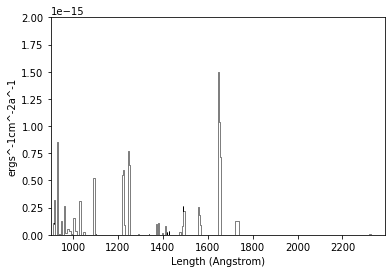

In [4]:
#subtract continuum fit
sp_contsub = sp.copy()
sp_contsub.data -= sp.specfit.get_full_model()
sp_contsub.plotter(xmin = 900, xmax = 2391, ymin = 0, ymax = 2e-15)


Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 1.065218e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]


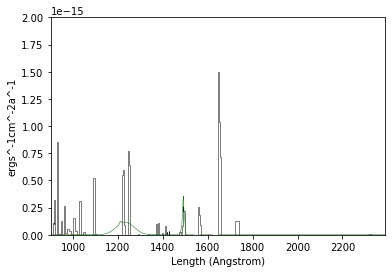

In [6]:
#fitting the spectral lines using the continuum subtracted data
Lalpha = 1215
NV = 1240
NIV = 1490
CIV = 1550
HeII = 1640

sp_contsub.plotter(xmin = 900, xmax = 2391, ymin = 0, ymax = 2e-15)

guesses = [50, Lalpha, 5, 100, NV, 5, 50, NV, 50, 50, NIV, 5, 20, CIV,
           5, 20, HeII, 5]

sp_contsub.specfit(fittype='gaussian', guesses=guesses, annotate = False, color = 'g')
sp_contsub.plotter.refresh()


In [ ]:
import pyspeckit 
import numpy as np

#continuum fitting tiny chunks with a gaussian and then appending
#loading data
data = '09-14_edited.txt'

# plotting data
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 900, xmax = 2391, ymin = 0, ymax = 2e-15)
sp.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
sp.plotter.refresh()

#Fitting with automatic guesses
#sp.specfit(fittype='gaussian')

#Fit with input guesses
amplitude_guess = 7e-16
center_guess = 850
width_guess = 350
guesses = [amplitude_guess, center_guess, width_guess] 
sp.specfit(fittype='gaussian', guesses=guesses, offset=-0.05e-15)
